## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [20]:
from TCGame_Env1 import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [21]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [22]:
# Function to convert state to list before send to env
def env_state(state):
    return [np.nan if val=='x' else int(val) for val in state.split("-") ]


In [23]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [24]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [25]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
max_epsilon = 1.0
min_epsilon = 0.001
def epsilon_greedy(state, time):
    epsilon = min_epsilon+ (max_epsilon - min_epsilon)*np.exp(-0.000001*time)
    z = np.random.random()
        
    if z > epsilon:
        action = max(Q_dict[state],key=Q_dict[state].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        action = random.choice(valid_actions(env_state(state)))    #Exploration: randomly choosing and action
    
    return tuple(action)


#### Tracking the state-action pairs for checking convergence - write your code here

In [26]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)

States_track = collections.defaultdict(dict)

In [27]:
# Initialise states to be tracked
def initialise_tracking_states():
    sample_q_values = [("x-x-x-x-x-x-x-x-x",[4,5]),("2-x-x-x-5-x-x-x-x",[9,7]),("2-x-x-x-5-x-6-x-7",[2,1]),("2-4-1-x-5-x-6-x-7",[3,9]),("2-4-1-9-5-8-6-x-7",[7,3])]    #select any 4 Q-values
    for q_values in sample_q_values:
        state = q_values[0]
        action = tuple(q_values[1])
        States_track[state][action] = []

In [28]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [29]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [30]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [31]:
#Defining parameters for the experiment

#EPISODES = 20
EPISODES = 5000000

track_episodes = 5000
LR = 0.01                   #learning rate
GAMMA = 0.8


### Q-update loop ---write your code here

<b> Steps in Q-Update Loop</b>
 - Initialize the Environment 
 - Initialise the terminal state to false since the start state is never the terminal state t+in this case
 - Fetch the inital state from the environment / manually mention the initial state
 - We have to add every state to Q-dict to keep a track which can be fulfilled by using add_to_dict
 - Using epsilon-greedy policy that has been defined find out exploration or exploitation and accordingly choose the next action
 - Pass the current state and action to environment so that environment can make its action but also decide whether state is terminal state or not and return the next state, reward.
 - Now calculate Q-Value of the current state and save the same to a dictionary
 - Continue steps 4 to 7 to until the game reaches terminal state
 - The above steps complete one episode<br>

<b>We have to run as many episodes as possible for agent to understand the nevironment and come up a policy using which it can win.</b>

In [32]:
start_time = time.time()

for episode in range(EPISODES):
    ##### Start writing your code from the next line
    env = TicTacToe()
    terminal = False
    state = env.state
    add_to_dict(state)
    while(terminal == False):
        curr_state = Q_state(state)
        curr_action = epsilon_greedy(curr_state, episode)
        reward , next_state, terminal = env.step(env_state(curr_state),curr_action)
        add_to_dict(next_state)
        next_state = Q_state(next_state)
        if (terminal == False):
            max_next = max(Q_dict[next_state],key=Q_dict[next_state].get)   #this gets the action corresponding to max q-value of next state
            Q_dict[curr_state][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state][max_next]))) - Q_dict[curr_state][curr_action] ) 
        else:
            Q_dict[curr_state][curr_action] += LR * (reward - Q_dict[curr_state][curr_action])
        state = env_state(next_state)
    
    
    if(episode%track_episodes == 0):
        save_tracking_states()
    
    
    
    
    
    
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

#### Check the Q-dictionary

In [33]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.5714941365989814,
              (0, 3): -1.5714784065198952,
              (0, 5): -1.5714976499201798,
              (0, 7): -1.5714673789344393,
              (0, 9): -1.571459510805081,
              (1, 1): -1.5714646878208407,
              (1, 3): -1.5714568207152382,
              (1, 5): -1.5714631835290356,
              (1, 7): -1.5714662644881248,
              (1, 9): -1.5714760099360872,
              (2, 1): -1.5715255109463877,
              (2, 3): -1.5712273237828007,
              (2, 5): -1.571481775270258,
              (2, 7): -1.5714779234115295,
              (2, 9): -1.5714993065232323,
              (3, 1): -1.5714805297258803,
              (3, 3): -1.5714742957535643,
              (3, 5): -1.571482873165938,
              (3, 7): -1.5714569146917319,
              (3, 9): -1.5714590921669929,
              (4, 1): -1.5715504701770575,
              (4, 3): -1.5714582703682325,
              (4, 

In [34]:
len(Q_dict)

3918710

In [35]:
# try checking for  the states - that which action your agent thinks is the best  -----This will not be evaluated
States_track

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(4, 5): [0,
               -0.6755544701365742,
               -0.8800428718065222,
               -0.9569655844657815,
               -0.9867219690399232,
               -0.9956484870804196,
               -0.9986022893742483,
               -0.999551053845078,
               -0.999887836614146,
               -0.9999628702079841,
               -0.999987075375057,
               -0.9999955905566119,
               -0.9999985836820454,
               -0.9999995119195771,
               -0.999999844795763,
               -1.0002735556511926,
               -1.000328575093155,
               -1.0007850483724243,
               -1.0012778795875703,
               -1.0022424618528043,
               -1.0029282941851192,
               -1.003026982021295,
               -1.0041186833610738,
               -1.005237632889087,
               -1.006617966246831,
               -1.0071766365105141,
               -1.008060858787339,
        

### Epsilon - decay check

In [36]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon+ (max_epsilon - min_epsilon)*np.exp(-0.000001*i))

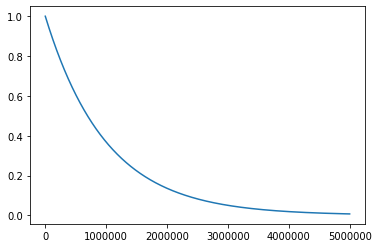

In [37]:
plt.plot(time, epsilon)
plt.show()